Text(0.5, 1.0, 'Distribution of Accident severity')

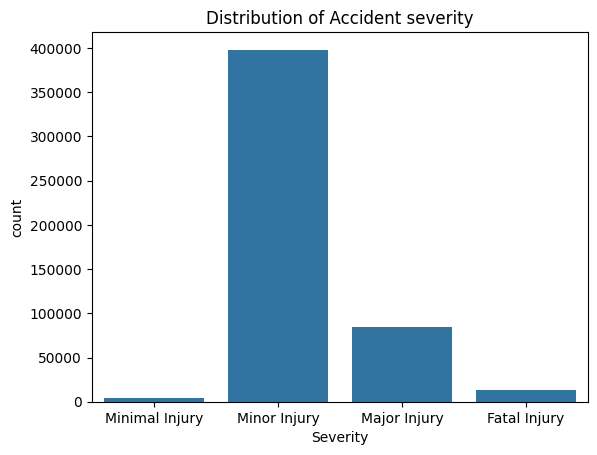

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
Accident_df = pd.read_csv(r'C:\Users\uday\Desktop\python\Task-5 data.csv')
Accident_df['Severity'] = Accident_df['Severity'].map({1: 'Minimal Injury', 2: 'Minor Injury', 3: 'Major Injury', 4: 'Fatal Injury'})
sns.countplot(x = Accident_df['Severity'])
plt.gca().invert_xaxis()
plt.title('Distribution of Accident severity')

In [78]:
states = Accident_df.State.unique()
len(states)
states_by_accidents = Accident_df.State.value_counts().reset_index(name='Count')
states_by_accidents.head(10)

,State,Count
0,CA,113274
1,FL,56710
2,TX,37355
3,SC,24737
4,NY,22594
5,NC,21750
6,VA,19515
7,PA,19351
8,MN,12333
9,OR,11559


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'FL'),
  Text(2, 0, 'TX'),
  Text(3, 0, 'SC'),
  Text(4, 0, 'NY'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'OR')])

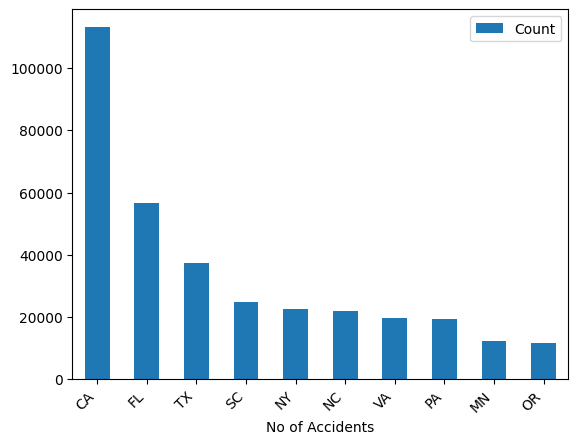

In [79]:
states_by_accidents.head(10).plot(kind='bar',x = 'State', y = 'Count', xlabel='No of Accidents')
plt.xticks(rotation=45, ha='right')

In [80]:
groupedby_states_severity = Accident_df.groupby(by=['Severity', 'State']).size().reset_index(name='Count')
groupedby_states_severity.sort_values(['Severity', 'Count'], ascending = [False, False])

,Severity,State,Count
140,Minor Injury,CA,93972
145,Minor Injury,FL,48695
178,Minor Injury,TX,28915
175,Minor Injury,SC,21400
162,Minor Injury,NC,18865
...,...,...,...
28,Fatal Injury,NH,11
19,Fatal Injury,ME,9
39,Fatal Injury,SD,7
44,Fatal Injury,VT,5


Text(0.5, 1.0, 'Distribution of Accidents Across Cities')

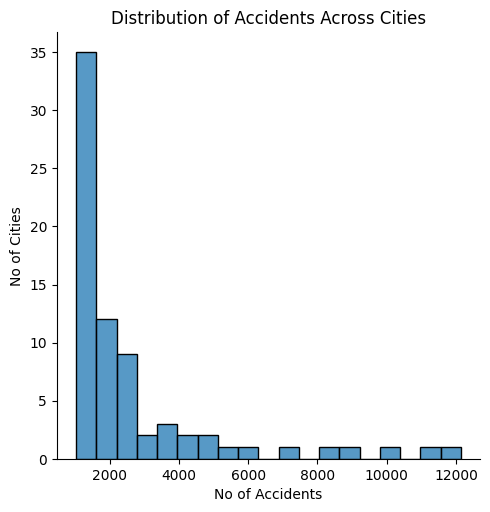

In [81]:
cities_by_accident = Accident_df.City.value_counts()
highest_cities_accident= cities_by_accident[cities_by_accident >=1000]
len(highest_cities_accident)
sns.displot(highest_cities_accident)
plt.xlabel('No of Accidents')
plt.ylabel('No of Cities')
plt.title('Distribution of Accidents Across Cities')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

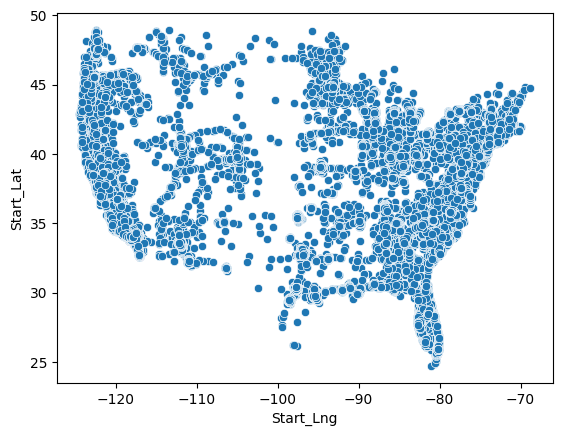

In [82]:
Accident_df.Start_Lat
Accident_df.Start_Lng
loc_df = Accident_df.sample(int(0.1 *len(Accident_df)))
sns.scatterplot(x=loc_df.Start_Lng,y= loc_df.Start_Lat)

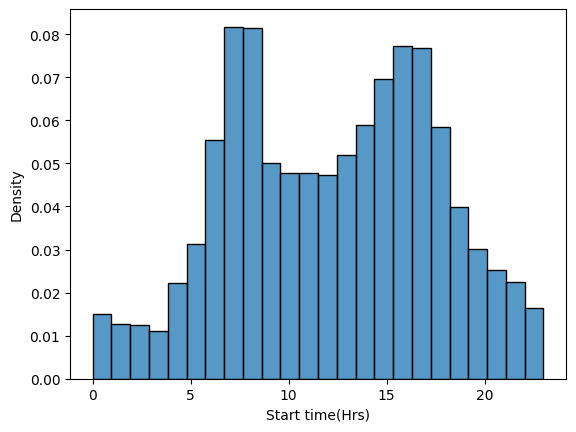

In [83]:
Accident_df.Start_Time
Accident_df['Start_Time'] = pd.to_datetime(Accident_df['Start_Time'], errors='coerce', dayfirst=True)
sns.histplot(Accident_df.Start_Time.dt.hour, bins=24, kde=False, stat="density")
plt.xlabel('Start time(Hrs)')
plt.show()

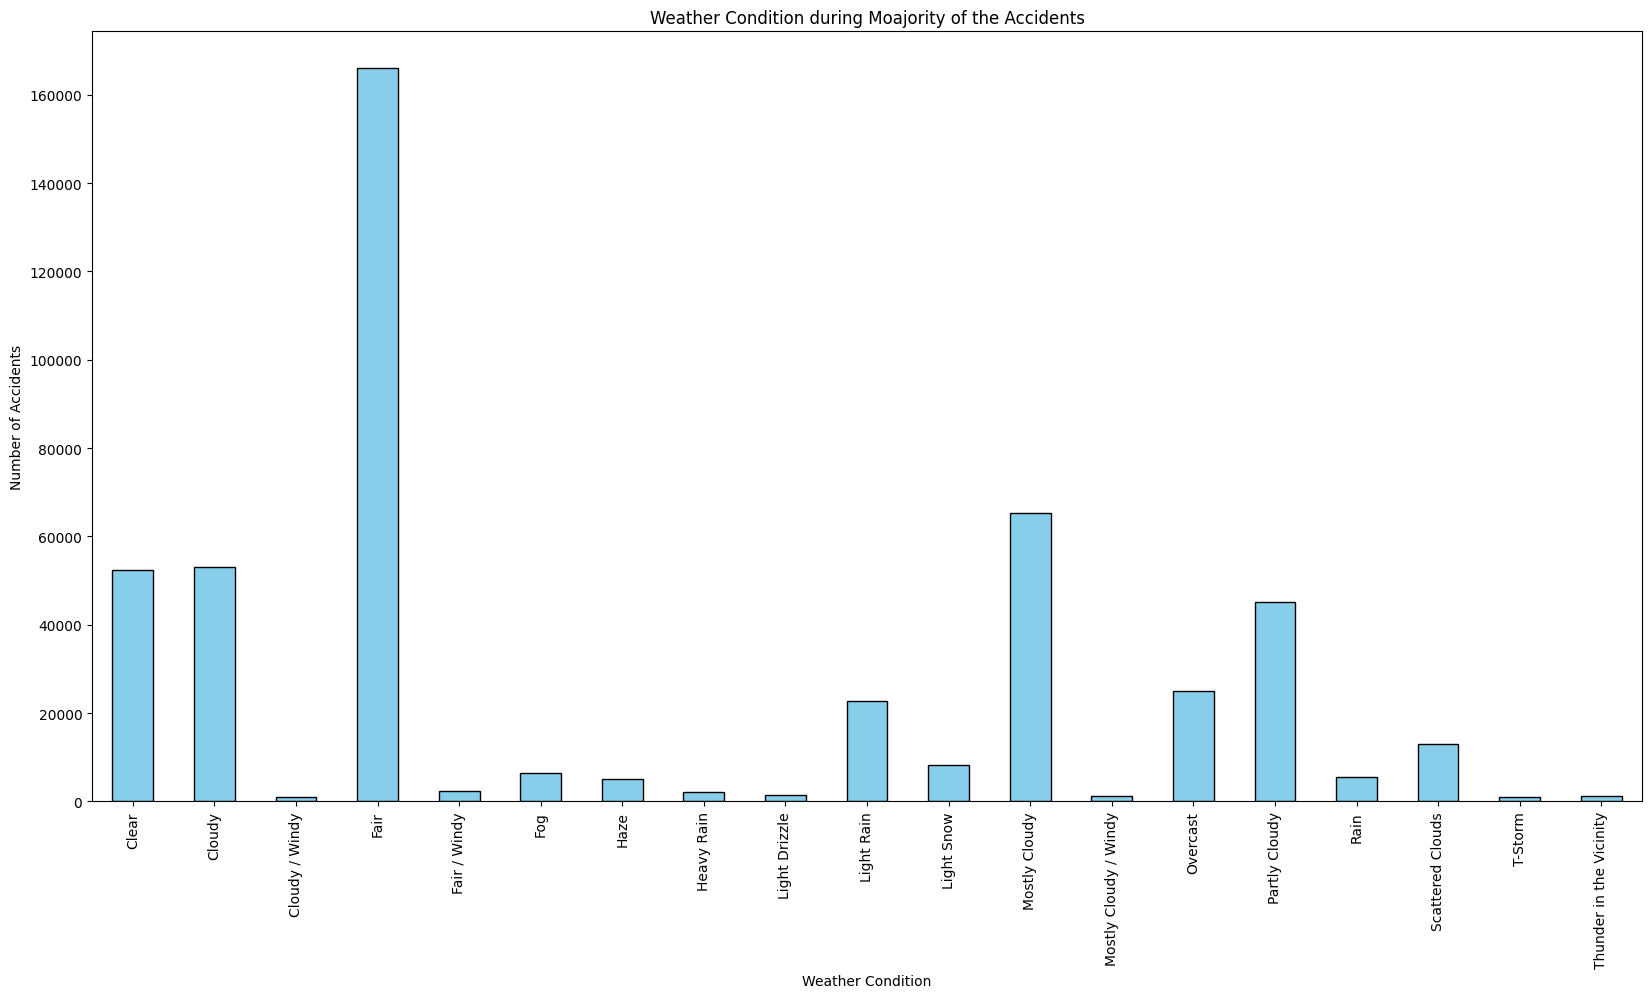

In [84]:
Weather_df = pd.DataFrame(Accident_df.Weather_Condition)
accidents_count = Accident_df['Weather_Condition'].value_counts().sort_index()
accidents_count_filtered = accidents_count[accidents_count > 1000]
plt.figure(figsize=(20,10))
accidents_count_filtered.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Weather Condition during Moajority of the Accidents')
plt.show()

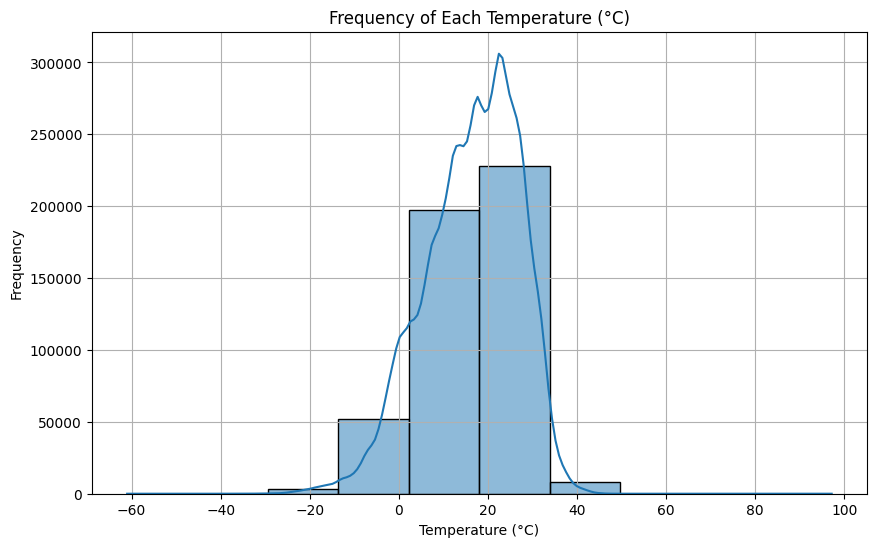

In [89]:
Temp_df = pd.DataFrame(Accident_df.Temperature)
Temp_df['Temperature_C'] = (Temp_df['Temperature'] - 32) * 5.0/9.0
Temp_df['Temperature_C'] = Temp_df['Temperature_C'].round(1)
temperature_counts = Temp_df['Temperature_C'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.histplot(Temp_df['Temperature_C'], bins=10, kde=True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Frequency of Each Temperature (°C)')
plt.grid(True)
plt.show()